In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# covid data files
covid_data_path = "../Data/covid-data.csv"
travel_data_path = "../Data/international-travel-covid.csv"

# read data
covid_data = pd.read_csv(covid_data_path)
travel_data = pd.read_csv(travel_data_path)

In [28]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [29]:
travel_data.head()

,Entity,Code,Day,international_travel_controls
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0


In [50]:
# remove rows for continents to avoid duplicate value with countries
continent = ['North America','South America','Africa','Asia','Europe', 'International']
covid_data[~covid_data.location.isin(continent)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,month_year
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96203,ZWE,Africa,Zimbabwe,2021-06-12,39852.0,164.0,97.714,1632.0,3.0,3.857,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,2021-06
96204,ZWE,Africa,Zimbabwe,2021-06-13,39959.0,107.0,110.000,1632.0,0.0,3.714,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,2021-06
96205,ZWE,Africa,Zimbabwe,2021-06-14,40077.0,118.0,119.857,1635.0,3.0,3.429,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,2021-06
96206,ZWE,Africa,Zimbabwe,2021-06-15,40318.0,241.0,142.429,1637.0,2.0,2.857,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,2021-06


In [51]:
# add extract month & year so we can group by month
covid_data["month_year"] = covid_data["date"].astype(str).str[:7]

In [52]:
# select required columns
covid_data_cleaned = covid_data[['month_year','continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths' ,'new_deaths']]
covid_data_cleaned

,month_year,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-02,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN
1,2020-02,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN
2,2020-02,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN
3,2020-02,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN
4,2020-02,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
96203,2021-06,Africa,Zimbabwe,2021-06-12,39852.0,164.0,1632.0,3.0
96204,2021-06,Africa,Zimbabwe,2021-06-13,39959.0,107.0,1632.0,0.0
96205,2021-06,Africa,Zimbabwe,2021-06-14,40077.0,118.0,1635.0,3.0
96206,2021-06,Africa,Zimbabwe,2021-06-15,40318.0,241.0,1637.0,2.0


In [53]:
# merge selected_covid_data and international_travel_data
merged_covid_df = pd.merge(covid_data_cleaned, travel_data, how='left', left_on=['date','location'], right_on = ['Day','Entity'])

In [54]:
merged_covid_df.head()

,month_year,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,Entity,Code,Day,international_travel_controls
0,2020-02,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,Afghanistan,AFG,2020-02-24,3.0
1,2020-02,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,Afghanistan,AFG,2020-02-25,3.0
2,2020-02,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,Afghanistan,AFG,2020-02-26,3.0
3,2020-02,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,Afghanistan,AFG,2020-02-27,3.0
4,2020-02,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,Afghanistan,AFG,2020-02-28,3.0


In [49]:
merged_covid_df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [97]:
au_df = merged_covid_df.loc[merged_covid_df['location'] == 'Australia']
monthly_au_new_case = au_df.groupby(['month_year'])['new_cases'].sum()

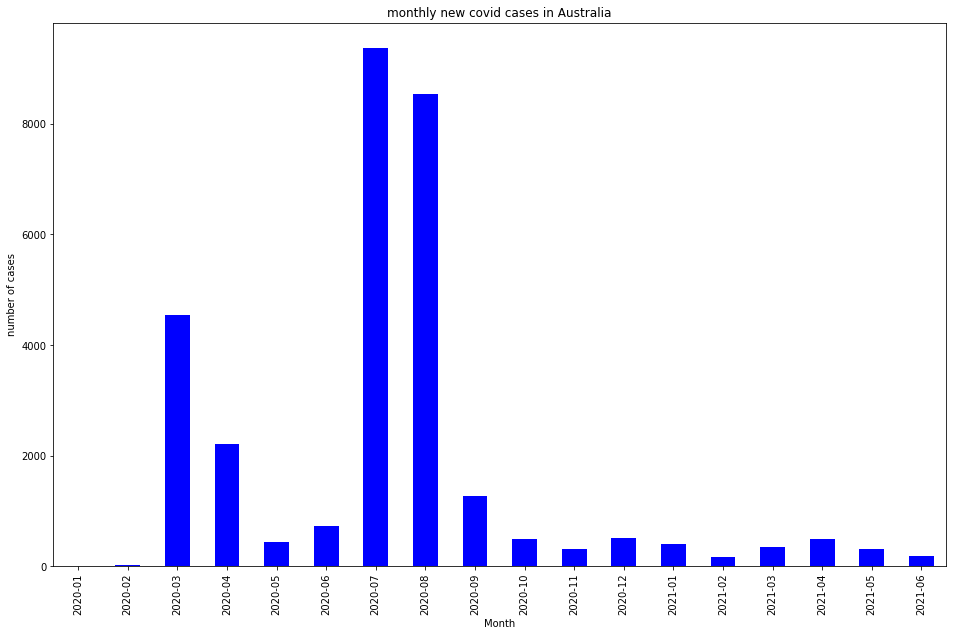

In [110]:
monthly_au_new_case.plot(kind="bar", color="b", figsize=(16, 10))
plt.title("monthly new covid cases in Australia")
plt.ylabel("number of cases")
plt.xlabel("Month")
plt.show()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


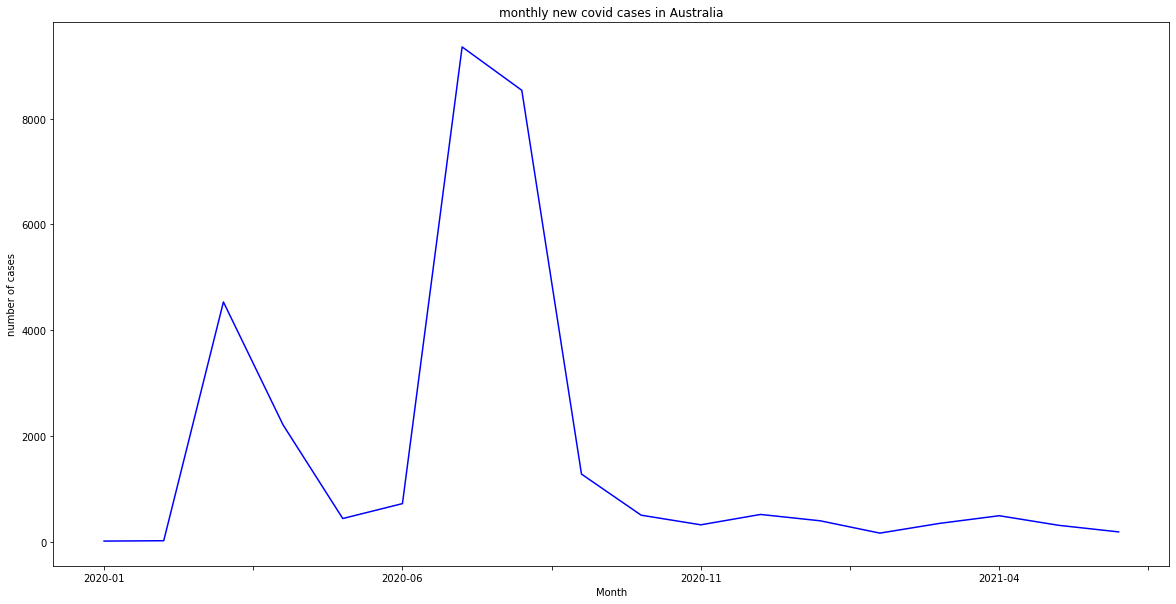

In [112]:
monthly_au_new_case.plot(kind="line", color="b", figsize=(20, 10))
plt.title("monthly new covid cases in Australia")
plt.ylabel("number of cases")
plt.xlabel("Month")
plt.show()

In [106]:
au_monthly_travel_control = au_df.groupby(['month_year'])['international_travel_controls'].mean()

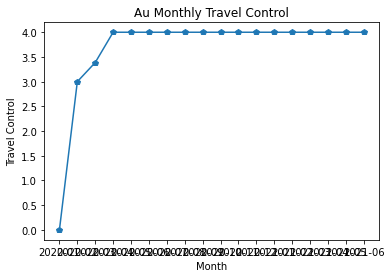

In [113]:
plt.plot(au_df['month_year'].unique(), au_monthly_travel_control, marker = 'p')
plt.xlabel("Month")
plt.ylabel("Travel Control")
plt.title("Au Monthly Travel Control")
plt.show()